# Python - Pandas 

- Selecting and subsetting data  
- Data types  
- Data manipulation and processing techniques  


## Series and DataFrames

In [1]:
import numpy as np
import pandas as pd

- Series

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- DataFrames # Very similar to R dataframes

In [3]:
import pandas as pd
dates = pd.date_range('20130101', periods=6) 
# R + lubridate:  dates <- ymd("2013-01-01")+days(0:5)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# R + tidyverse: 
# m <- matrix(rnorm(6*4), ncol = 4)
# colnames(m) <- c("A", "B", "C", "D")
# df <- as_tibble(m) %>% mutate(dates)
df

,A,B,C,D
2013-01-01,-0.337876,-1.133784,0.489609,-0.710291
2013-01-02,0.361925,0.615689,-1.326005,-0.538592
2013-01-03,0.389151,0.525299,-0.127917,-0.570661
2013-01-04,-0.166400,0.124358,-0.429019,0.459688
2013-01-05,1.378717,0.194365,1.784033,0.591172
2013-01-06,-1.322239,-1.297773,-1.081477,-0.760970


## Pandas vs. R

In [5]:
df.shape # R: dim(df)

(6, 4)

In [6]:
df.head(3) # R: head(df, 3)

,A,B,C,D
2013-01-01,-0.337876,-1.133784,0.489609,-0.710291
2013-01-02,0.361925,0.615689,-1.326005,-0.538592
2013-01-03,0.389151,0.525299,-0.127917,-0.570661


In [7]:
df.mean()
# R + tidyverse: df %>% select_if(is.numeric) %>% map_dbl(mean, na.rm = TRUE)

A    0.050546
B   -0.161974
C   -0.115129
D   -0.254942
dtype: float64

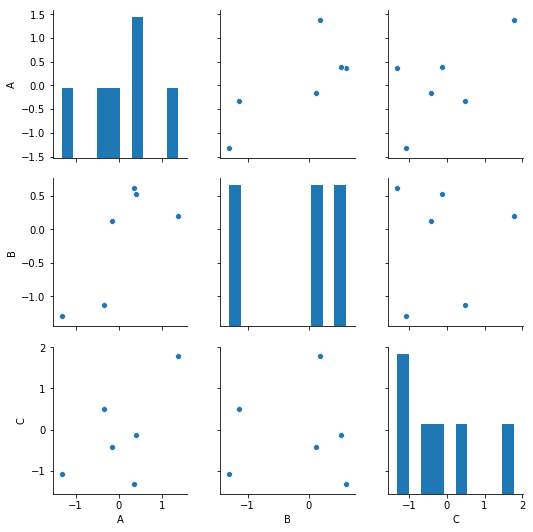

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[["A", "B", "C"]])
plt.show()
# R + GGally: df %>% select(A, B, C) %>% ggpairs()

## Pandas vs. Tidyr

| **pandas** | **tidyr** |
| :---: | :---: |
| melt |	gather |
| pivot |	spread |

## Pandas vs. Dplyr
| **pandas** | **dplyr** |
| :---: | :---: |
| mutate |	assign |
| select |	filter |
| rename |	rename |
| filter |	query |
| arrange |	sort_values |
| group_by |	groupby |
| summarize |	agg |